# Imports and loading data

In [ ]:
 !rm -r emerging_entities_17

In [ ]:
! git clone https://github.com/leondz/emerging_entities_17.git

Cloning into 'emerging_entities_17'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53
Unpacking objects: 100% (53/53), done.


In [ ]:
# !pip install boto3 jsonnet jsonpickle tensorboardX conllu overrides word2number py-rouge
# !pip install --no-deps allennlp==1.1.0 allennlp_models==1.4.1

# !pip install \
# transformers==3.0.1 \
# seqeval \
# tqdm \
# flair \
# sklearn_crfsuite \
# nltk

In [ ]:
!pip install transformers

ERROR: allennlp 1.1.0 has requirement torch<1.7.0,>=1.6.0, but you'll have torch 1.7.1 which is incompatible.
ERROR: allennlp 1.1.0 has requirement transformers<3.1,>=3.0, but you'll have transformers 4.6.1 which is incompatible.
ERROR: allennlp-models 1.4.1 has requirement allennlp<1.5,>=1.4.1, but you'll have allennlp 1.1.0 which is incompatible.
ERROR: allennlp-models 1.4.1 has requirement conllu==4.3, but you'll have conllu 4.4 which is incompatible.
  Found existing installation: huggingface-hub 0.0.9
    Uninstalling huggingface-hub-0.0.9:
      Successfully uninstalled huggingface-hub-0.0.9


In [ ]:
import torch
import torch.nn as nn
import transformers


import math
from tqdm import tqdm



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np

In [ ]:
device = torch.device('cuda:0')
n_gpu = torch.cuda.device_count()

for i in range(n_gpu):
    print(torch
    .cuda.get_device_name(i))

Tesla K80


# Converting data to needed format

In [ ]:
# def data_to_format(path):
#     data = []
#     with open(path, 'r') as f:
#         sentence = ''
#         for line in tqdm(f.readlines()):
#           line = line[:-1]
#           if len(line) == 0 or len(line) == 1:
#               sentence = sentence[:-1] + '\n'
#               data.append(sentence)
#               sentence = ''
#           else:
#               line = line.split('\t')
#               sentence += line[0] + '###' + line[1] + '\t'
#     with open('seq_' + path.split('/')[-1], 'w') as f:
#         for d in data:
#             f.write(d)

In [ ]:
# data_to_format("/content/emerging_entities_17/wnut17train.conll")
# data_to_format("/content/emerging_entities_17/emerging.dev.conll")

# Using AllenNLP

In [ ]:
# from allennlp.data.token_indexers import PretrainedTransformerMismatchedIndexer
# from allennlp.data.dataset_readers.sequence_tagging import SequenceTaggingDatasetReader


# indexer = PretrainedTransformerMismatchedIndexer('bert-large-cased')
# reader = SequenceTaggingDatasetReader(token_delimiter="\t", token_indexers={'tokens': indexer})

In [ ]:
# train_dataset = reader.read("/content/seq_wnut17train.conll")
# dev_dataset = reader.read("/content/seq_emerging.dev.conll")

In [ ]:
# print(train_dataset[0])

In [ ]:
# from allennlp.data.vocabulary import Vocabulary

# vocab = Vocabulary.from_instances(train_dataset.instances)

# train_dataset.index_with(vocab)
# dev_dataset.index_with(vocab)

In [ ]:
# from allennlp.modules.token_embedders import PretrainedTransformerMismatchedEmbedder
# from allennlp.modules.seq2seq_encoders.pytorch_seq2seq_wrapper import LstmSeq2SeqEncoder
# from allennlp.modules.token_embedders import Embedding
# from allennlp.modules.text_field_embedders.basic_text_field_embedder import BasicTextFieldEmbedder

# embedder = PretrainedTransformerMismatchedEmbedder(model_name='bert-large-cased')
# text_field_embedder = BasicTextFieldEmbedder({'tokens': embedder})
# encoder = LstmSeq2SeqEncoder(input_size=embedder.get_output_dim(), hidden_size=1024, bidirectional=True, dropout = 0.5, num_layers = 5)

In [ ]:
# from allennlp.models import SimpleTagger
# from allennlp_models.tagging import CrfTagger


# model = CrfTagger(text_field_embedder=text_field_embedder, 
#                       vocab=vocab, 
#                       encoder=encoder,
#                       calculate_span_f1 = True,
#                       label_encoding = 'BIO'
#                      ).cuda(device=device)

In [ ]:
# torch.cuda.empty_cache()

In [ ]:
# import torch.optim as optim
# from allennlp.training.learning_rate_schedulers import LinearWithWarmup, ReduceOnPlateauLearningRateScheduler, SlantedTriangular
# from allennlp.training import GradientDescentTrainer
# from torch.utils.data import DataLoader
# from allennlp.data import allennlp_collate
# from datetime import datetime



# num_epochs = 20
# batch_size = 8
# steps_per_epoch = math.ceil(len(train_dataset) / batch_size)

# optimizer = optim.Adam(model.parameters(), lr=3e-5, betas=(0.9, 0.98))
# train_data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, 
#                                collate_fn=allennlp_collate, shuffle=True)
# val_data_loader = DataLoader(dataset=dev_dataset, batch_size=batch_size, collate_fn=allennlp_collate)
# lr_scheduler = ReduceOnPlateauLearningRateScheduler(optimizer, patience=1, factor=0.5)


# date_time = datetime.now()
# date_str = date_time.strftime('%m/%d/%Y')
# time_str = date_time.strftime('%H:%M:%S')


# trainer = GradientDescentTrainer(
#     model=model,
#     optimizer=optimizer,
#     data_loader=train_data_loader,
#     validation_data_loader=val_data_loader,
#     num_epochs=num_epochs,
#     cuda_device=device,
#     learning_rate_scheduler=lr_scheduler,
#     num_gradient_accumulation_steps=1,
#     grad_clipping=1.
# )

# try:
#     metrics = trainer.train()
# except KeyboardInterrupt:
#     pass

In [ ]:
# from allennlp.predictors.sentence_tagger import SentenceTaggerPredictor
# predictor = SentenceTaggerPredictor(model, reader)

# preds = predictor.predict(' '.join(list(map(str,list(train_dataset[0].fields['tokens'])))))
# list(zip(preds['words'], preds['tags']))

# Not using AllenNLP (First dataset)

In [ ]:
!pip install flair

     |████████████████████████████████| 61kB 1.7MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: allennlp 1.1.0 has requirement torch<1.7.0,>=1.6.0, but you'll have torch 1.7.1 which is incompatible.
ERROR: allennlp 1.1.0 has requirement transformers<3.1,>=3.0, but you'll have transformers 4.6.1 which is incompatible.
ERROR: allennlp-models 1.4.1 has requirement allennlp<1.5,>=1.4.1, but you'll have allennlp 1.1.0 which is incompatible.
ERROR: allennlp-models 1.4.1 has requirement conllu==4.3, but you'll have conllu 4.4 which is incompatible.
  Found existing installation: importlib-metadata 4.0.1
    Uninstalling importlib-metadata-4.0.1:
      Successfully uninstalled importlib-metadata-4.0.1
  Fo

In [ ]:
from flair.datasets import ColumnCorpus


data_folder = '/content/emerging_entities_17/'

corpora = ColumnCorpus(data_folder, 
                      {0 : 'text', 1 : 'ner'},
                      train_file='wnut17train.conll',
                      test_file='emerging.test.conll',
                      dev_file='emerging.dev.conll')

print(corpora.obtain_statistics())

2021-05-28 14:58:57,838 Reading data from /content/emerging_entities_17
2021-05-28 14:58:57,839 Train: /content/emerging_entities_17/wnut17train.conll
2021-05-28 14:58:57,845 Dev: /content/emerging_entities_17/emerging.dev.conll
2021-05-28 14:58:57,848 Test: /content/emerging_entities_17/emerging.test.conll
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3394,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 62730,
            "min": 1,
            "max": 41,
            "avg": 18.482616381850324
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 1287,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 23391,
            "min": 1,
            "max": 105,
            "avg": 18.174825174825173
        }
    },
    "DEV": {
        "dataset": 

In [ ]:
def create_dataset(flair_dataset):
    dataset = []
    
    for sent in flair_dataset:
        tokens = [w.text for w in sent]
        labels = [w.get_tag('ner').value for w in sent]
        dataset.append((tokens, labels))
        
    return dataset

In [ ]:
train_dataset = create_dataset(corpora.train)
dev_dataset = create_dataset(corpora.dev)
test_dataset= create_dataset(corpora.test)

In [ ]:
train_dataset[1]

(['From',
  'Green',
  'Newsfeed',
  ':',
  'AHFA',
  'extends',
  'deadline',
  'for',
  'Sage',
  'Award',
  'to',
  'Nov',
  '.',
  '5',
  'http://tinyurl.com/24agj38'],
 ['O',
  'O',
  'O',
  'O',
  'B-group',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'])

In [ ]:
word_to_ix = {}
tag_to_ix = {}

word_to_ix['PAD'] = 0
tag_to_ix['PAD'] = 0

for element in train_dataset:
    words, tags = element
    for word in words:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
    
    for tag in tags:
        if tag not in tag_to_ix:
            tag_to_ix[tag] = len(tag_to_ix)

print('Vocabulary to convert words to indexes:')
print(dict(list(word_to_ix.items())[:100]))

print()

print('Vocabulary to convert tags to indexes:')
print(tag_to_ix)

Vocabulary to convert words to indexes:
{'PAD': 0, '@paulwalk': 1, 'It': 2, "'s": 3, 'the': 4, 'view': 5, 'from': 6, 'where': 7, 'I': 8, "'m": 9, 'living': 10, 'for': 11, 'two': 12, 'weeks': 13, '.': 14, 'Empire': 15, 'State': 16, 'Building': 17, '=': 18, 'ESB': 19, 'Pretty': 20, 'bad': 21, 'storm': 22, 'here': 23, 'last': 24, 'evening': 25, 'From': 26, 'Green': 27, 'Newsfeed': 28, ':': 29, 'AHFA': 30, 'extends': 31, 'deadline': 32, 'Sage': 33, 'Award': 34, 'to': 35, 'Nov': 36, '5': 37, 'http://tinyurl.com/24agj38': 38, 'Pxleyes': 39, 'Top': 40, '50': 41, 'Photography': 42, 'Contest': 43, 'Pictures': 44, 'of': 45, 'August': 46, '2010': 47, '...': 48, 'http://bit.ly/bgCyZ0': 49, '#photography': 50, 'today': 51, 'is': 52, 'my': 53, 'day': 54, 'at': 55, 'office': 56, '4Dbling': 57, 'place': 58, 'til': 59, 'monday': 60, ',': 61, 'party': 62, '&lt;': 63, '3': 64, 'watching': 65, 'VMA': 66, 'pre-show': 67, 'again': 68, 'lol': 69, 'it': 70, 'was': 71, "n't": 72, 'even': 73, 'a': 74, 'good': 7

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


class BasicLstmTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, 
                 tagset_size, dropout_rate=0.7):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, num_layers=2)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.hidden2tag = nn.Linear(hidden_dim*2, tagset_size)

    def forward(self, sentences, lengths):
        embeds = self.word_embeddings(sentences)

        packed_embeds = pack_padded_sequence(embeds.transpose(0, 1), lengths, enforce_sorted=False)
        packed_lstm_out, _ = self.lstm(packed_embeds)
        lstm_out, _ = pad_packed_sequence(packed_lstm_out)

        tag_space = self.hidden2tag(self.dropout(lstm_out.transpose(0, 1)))
        tag_scores = F.log_softmax(tag_space, dim=-1)
        return tag_scores

In [ ]:
model = BasicLstmTagger(embedding_dim=50, 
                        hidden_dim=50, 
                        vocab_size=len(word_to_ix), 
                        tagset_size=len(tag_to_ix),
                        dropout_rate=0.15).cuda()

In [ ]:
def prepare_tokens(batch_tokens, word_to_ix):
    batch_token_ids = [[word_to_ix.get(tok, 0) for tok in inst] for inst in batch_tokens]
    batch_max_len = max([len(s) for s in batch_token_ids])
    
    batch_token_ids_padded = word_to_ix['PAD']*np.ones((len(batch_token_ids), batch_max_len))
    lengths = []
    for i in range(len(batch_token_ids)):
        cur_len = len(batch_token_ids[i])
        batch_token_ids_padded[i][:cur_len] = batch_token_ids[i]
        lengths.append(cur_len)

    return torch.LongTensor(batch_token_ids_padded), lengths


def prepare_tags(batch_tags, tag_to_ix):
    batch_tag_ids = [[tag_to_ix[tag] for tag in inst] for inst in batch_tags]
    batch_max_len = max([len(s) for s in batch_tag_ids])

    batch_tag_ids_padded = tag_to_ix['PAD']*np.ones((len(batch_tag_ids), batch_max_len))
    for i in range(len(batch_tag_ids)):
        cur_len = len(batch_tag_ids[i])
        batch_tag_ids_padded[i][:cur_len] = batch_tag_ids[i]
    
    return torch.LongTensor(batch_tag_ids_padded)


def prepare_instance_for_training(batch_instances, word_to_ix, tag_to_ix):
    tokens, lengths = prepare_tokens([inst[0] for inst in batch_instances], word_to_ix)
    tags = prepare_tags([inst[1] for inst in batch_instances], tag_to_ix)

    return tokens, lengths, tags

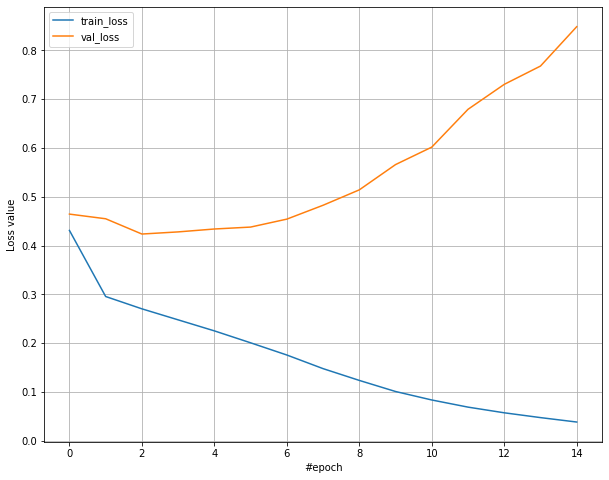

In [ ]:
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import clear_output




N_EPOCHS = 15
LEARNING_RATE = 1e-3                        
BATCH_SIZE= 8

loss_function = nn.NLLLoss(ignore_index=tag_to_ix['PAD'])
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, betas= (0.9, 0.98))
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)

f_preprocess = lambda batch: prepare_instance_for_training(batch, word_to_ix, tag_to_ix)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=f_preprocess)

dev_dataloader = DataLoader(dev_dataset, 
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=f_preprocess)



try:
    
    losses = []
    losses_val = []
    for epoch in range(N_EPOCHS):
        print(f'Epoch #{epoch}')
        total_loss = 0
        # Переводи модель в режим тренировки
        model.train()
        # Получаем батчи
        for sentences, lengths, targets in tqdm(train_dataloader):
            # Переносим данные на видеокарту
            sentences = sentences.cuda()
            targets = targets.cuda()

            # Pytorch накапливает градиенты и нужно их занулять
            model.zero_grad()

            # Прогоняем модель
            tag_scores = model(sentences, lengths)

            # Считаем Лосс 
            loss = loss_function(tag_scores.reshape(-1, tag_scores.shape[-1]), targets.reshape(-1))
            # Считам производные
            loss.backward()
            total_loss += loss.item()
            # Обновляем параметры модели
            optimizer.step()

        losses.append(total_loss/ len(train_dataloader))
        # переводим модель в режим тестирования
        model.eval()
        total_loss_val = 0
        for sentences, lengths, targets in tqdm(dev_dataloader):
            # Переносим данные на видеокарту
            sentences = sentences.cuda()
            targets = targets.cuda()

            # не считаем градиенты
            with torch.no_grad():
                tag_scores = model(sentences, lengths)

            loss = loss_function(tag_scores.reshape(-1, tag_scores.shape[-1]), targets.reshape(-1))
            # scheduler.step(loss)
            total_loss_val += loss.item()
        
        losses_val.append(total_loss_val/ len(dev_dataloader))
        clear_output(wait = True)
        plt.figure(figsize=(10,8))
        plt.plot(losses, label='train_loss')
        plt.plot(losses_val, label='val_loss')
        plt.xlabel('#epoch')
        plt.ylabel('Loss value')
        plt.legend()
        plt.grid()
        plt.show()



except KeyboardInterrupt:
    pass

In [ ]:
# Тестирование

pred_dataset = [inst[0] for inst in test_dataset]

f_preprocess = lambda batch: prepare_tokens(batch, word_to_ix)
pred_dataloader = DataLoader(pred_dataset, 
                             batch_size=100, 
                             num_workers=1,
                             collate_fn=f_preprocess)

model.eval()

all_preds = []
all_probas = []
with torch.no_grad():
    for sentences, lengths in pred_dataloader:
        sentences = sentences.cuda()

        tag_scores = model(sentences, lengths)
        probas, pred_tags = tag_scores.max(dim=-1)
        probas = torch.exp(probas)
        
        pred_tags = pred_tags.cpu().tolist()
        probas = probas.cpu().tolist()
        all_preds += pred_tags
        all_probas += probas

In [ ]:


ix_to_tag = {v: k for k, v in tag_to_ix.items()}

pred_tags = []
pred_probas = []
for pred_sent, preds, probas in zip(pred_dataset, all_preds, all_probas):
    pred_tags.append([ix_to_tag[tag_idx] for tag_idx in preds[:len(pred_sent)]])
    pred_probas.append(probas[:len(pred_sent)])

idx = 6

list(zip(pred_dataset[idx], pred_tags[idx], pred_probas[idx]))

[('Visuals', 'O', 0.9809644818305969),
 ('of', 'O', 0.9999764561653137),
 ('the', 'O', 0.9999862909317017),
 ('avalanche', 'O', 0.8833470940589905),
 ('site', 'O', 0.9999822974205017),
 ('in', 'O', 0.9999993443489075),
 ('Gurez', 'B-location', 0.9828940629959106),
 ('sector', 'I-location', 0.9228472113609314),
 ('.', 'O', 0.9996772408485413)]

In [ ]:
!pip install seqeval

In [ ]:
from seqeval.metrics import f1_score

f1_score(pred_tags, [inst[1] for inst in test_dataset])

0.0281107895824721

# Not using AllenNLP (Second dataset)



In [ ]:
!pip install flair


In [ ]:
from flair.datasets import ColumnCorpus


data_folder = '/content/'

corpora = ColumnCorpus(data_folder, 
                      {0 : 'text', 3 : 'ner'},
                      train_file='train.txt',
                      test_file='test.txt',
                      dev_file='valid.txt')
    
print(corpora.obtain_statistics())

2021-05-28 15:17:56,233 Reading data from /content
2021-05-28 15:17:56,237 Train: /content/train.txt
2021-05-28 15:17:56,239 Dev: /content/valid.txt
2021-05-28 15:17:56,241 Test: /content/test.txt
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 14987,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 204567,
            "min": 1,
            "max": 113,
            "avg": 13.649629679055181
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 3684,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 46666,
            "min": 1,
            "max": 124,
            "avg": 12.667209554831704
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_documents": 3466,
        "number_of_documents_per_class": {},
        "numbe

In [ ]:
def create_dataset(flair_dataset):
    dataset = []
    
    for sent in flair_dataset:
        tokens = [w.text for w in sent]
        labels = [w.get_tag('ner').value for w in sent]
        dataset.append((tokens, labels))
        
    return dataset

In [ ]:
train_dataset = create_dataset(corpora.train)
dev_dataset = create_dataset(corpora.dev)
test_dataset= create_dataset(corpora.test)

In [ ]:
word_to_ix = {}
tag_to_ix = {}

word_to_ix['PAD'] = 0
tag_to_ix['PAD'] = 0

for element in train_dataset:
    words, tags = element
    for word in words:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
    
    for tag in tags:
        if tag not in tag_to_ix:
            tag_to_ix[tag] = len(tag_to_ix)

print('Vocabulary to convert words to indexes:')
print(dict(list(word_to_ix.items())[:100]))

print()

print('Vocabulary to convert tags to indexes:')
print(tag_to_ix)

Vocabulary to convert words to indexes:
{'PAD': 0, '-DOCSTART-': 1, 'EU': 2, 'rejects': 3, 'German': 4, 'call': 5, 'to': 6, 'boycott': 7, 'British': 8, 'lamb': 9, '.': 10, 'Peter': 11, 'Blackburn': 12, 'BRUSSELS': 13, '1996-08-22': 14, 'The': 15, 'European': 16, 'Commission': 17, 'said': 18, 'on': 19, 'Thursday': 20, 'it': 21, 'disagreed': 22, 'with': 23, 'advice': 24, 'consumers': 25, 'shun': 26, 'until': 27, 'scientists': 28, 'determine': 29, 'whether': 30, 'mad': 31, 'cow': 32, 'disease': 33, 'can': 34, 'be': 35, 'transmitted': 36, 'sheep': 37, 'Germany': 38, "'s": 39, 'representative': 40, 'the': 41, 'Union': 42, 'veterinary': 43, 'committee': 44, 'Werner': 45, 'Zwingmann': 46, 'Wednesday': 47, 'should': 48, 'buy': 49, 'sheepmeat': 50, 'from': 51, 'countries': 52, 'other': 53, 'than': 54, 'Britain': 55, 'scientific': 56, 'was': 57, 'clearer': 58, '"': 59, 'We': 60, 'do': 61, "n't": 62, 'support': 63, 'any': 64, 'such': 65, 'recommendation': 66, 'because': 67, 'we': 68, 'see': 69, '

In [ ]:
model = BasicLstmTagger(embedding_dim=50, 
                        hidden_dim=50, 
                        vocab_size=len(word_to_ix), 
                        tagset_size=len(tag_to_ix),
                        dropout_rate=0.15).cuda()

In [ ]:
def prepare_tokens(batch_tokens, word_to_ix):
    batch_token_ids = [[word_to_ix.get(tok, 0) for tok in inst] for inst in batch_tokens]
    batch_max_len = max([len(s) for s in batch_token_ids])
    
    batch_token_ids_padded = word_to_ix['PAD']*np.ones((len(batch_token_ids), batch_max_len))
    lengths = []
    for i in range(len(batch_token_ids)):
        cur_len = len(batch_token_ids[i])
        batch_token_ids_padded[i][:cur_len] = batch_token_ids[i]
        lengths.append(cur_len)

    return torch.LongTensor(batch_token_ids_padded), lengths


def prepare_tags(batch_tags, tag_to_ix):
    batch_tag_ids = [[tag_to_ix[tag] for tag in inst] for inst in batch_tags]
    batch_max_len = max([len(s) for s in batch_tag_ids])

    batch_tag_ids_padded = tag_to_ix['PAD']*np.ones((len(batch_tag_ids), batch_max_len))
    for i in range(len(batch_tag_ids)):
        cur_len = len(batch_tag_ids[i])
        batch_tag_ids_padded[i][:cur_len] = batch_tag_ids[i]
    
    return torch.LongTensor(batch_tag_ids_padded)


def prepare_instance_for_training(batch_instances, word_to_ix, tag_to_ix):
    tokens, lengths = prepare_tokens([inst[0] for inst in batch_instances], word_to_ix)
    tags = prepare_tags([inst[1] for inst in batch_instances], tag_to_ix)

    return tokens, lengths, tags

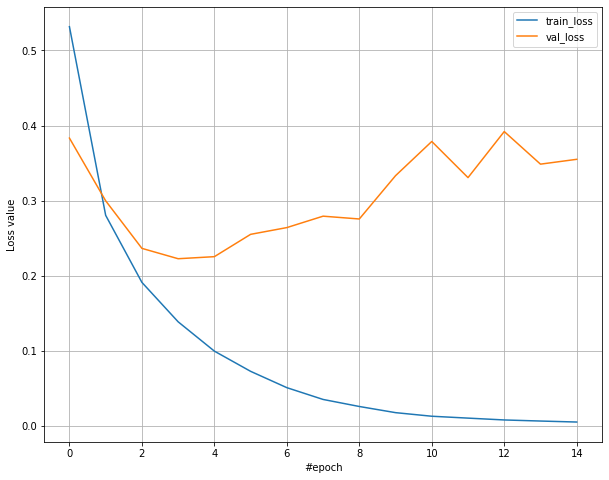

In [ ]:
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import clear_output




N_EPOCHS = 15
LEARNING_RATE = 1e-3                        
BATCH_SIZE= 8

loss_function = nn.NLLLoss(ignore_index=tag_to_ix['PAD'])
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, betas= (0.9, 0.98))
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)

f_preprocess = lambda batch: prepare_instance_for_training(batch, word_to_ix, tag_to_ix)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=f_preprocess)

dev_dataloader = DataLoader(dev_dataset, 
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=f_preprocess)



try:
    
    losses = []
    losses_val = []
    for epoch in range(N_EPOCHS):
        print(f'Epoch #{epoch}')
        total_loss = 0
        # Переводи модель в режим тренировки
        model.train()
        # Получаем батчи
        for sentences, lengths, targets in tqdm(train_dataloader):
            # Переносим данные на видеокарту
            sentences = sentences.cuda()
            targets = targets.cuda()

            # Pytorch накапливает градиенты и нужно их занулять
            model.zero_grad()

            # Прогоняем модель
            tag_scores = model(sentences, lengths)

            # Считаем Лосс 
            loss = loss_function(tag_scores.reshape(-1, tag_scores.shape[-1]), targets.reshape(-1))
            # Считам производные
            loss.backward()
            total_loss += loss.item()
            # Обновляем параметры модели
            optimizer.step()

        losses.append(total_loss/ len(train_dataloader))
        # переводим модель в режим тестирования
        model.eval()
        total_loss_val = 0
        for sentences, lengths, targets in tqdm(dev_dataloader):
            # Переносим данные на видеокарту
            sentences = sentences.cuda()
            targets = targets.cuda()

            # не считаем градиенты
            with torch.no_grad():
                tag_scores = model(sentences, lengths)

            loss = loss_function(tag_scores.reshape(-1, tag_scores.shape[-1]), targets.reshape(-1))
            # scheduler.step(loss)
            total_loss_val += loss.item()
        
        losses_val.append(total_loss_val/ len(dev_dataloader))
        clear_output(wait = True)
        plt.figure(figsize=(10,8))
        plt.plot(losses, label='train_loss')
        plt.plot(losses_val, label='val_loss')
        plt.xlabel('#epoch')
        plt.ylabel('Loss value')
        plt.legend()
        plt.grid()
        plt.show()



except KeyboardInterrupt:
    pass

In [ ]:
# Тестирование

pred_dataset = [inst[0] for inst in test_dataset]

f_preprocess = lambda batch: prepare_tokens(batch, word_to_ix)
pred_dataloader = DataLoader(pred_dataset, 
                             batch_size=100, 
                             num_workers=1,
                             collate_fn=f_preprocess)

model.eval()

all_preds = []
all_probas = []
with torch.no_grad():
    for sentences, lengths in pred_dataloader:
        sentences = sentences.cuda()

        tag_scores = model(sentences, lengths)
        probas, pred_tags = tag_scores.max(dim=-1)
        probas = torch.exp(probas)
        
        pred_tags = pred_tags.cpu().tolist()
        probas = probas.cpu().tolist()
        all_preds += pred_tags
        all_probas += probas

In [ ]:


ix_to_tag = {v: k for k, v in tag_to_ix.items()}

pred_tags = []
pred_probas = []
for pred_sent, preds, probas in zip(pred_dataset, all_preds, all_probas):
    pred_tags.append([ix_to_tag[tag_idx] for tag_idx in preds[:len(pred_sent)]])
    pred_probas.append(probas[:len(pred_sent)])

idx = 4

list(zip(pred_dataset[idx], pred_tags[idx], pred_probas[idx]))

[('Japan', 'B-LOC', 0.9997560381889343),
 ('began', 'O', 1.0),
 ('the', 'O', 1.0),
 ('defence', 'O', 1.0),
 ('of', 'O', 1.0),
 ('their', 'O', 0.9998409152030945),
 ('Asian', 'B-MISC', 0.9999946355819702),
 ('Cup', 'I-MISC', 0.998482346534729),
 ('title', 'O', 0.9999855756759644),
 ('with', 'O', 1.0),
 ('a', 'O', 1.0),
 ('lucky', 'O', 0.9999998807907104),
 ('2-1', 'O', 1.0),
 ('win', 'O', 0.9999996423721313),
 ('against', 'O', 1.0),
 ('Syria', 'B-LOC', 0.9998398423194885),
 ('in', 'O', 0.9982238411903381),
 ('a', 'O', 1.0),
 ('Group', 'O', 0.8941879272460938),
 ('C', 'O', 0.9971284866333008),
 ('championship', 'O', 1.0),
 ('match', 'O', 0.9999995231628418),
 ('on', 'O', 1.0),
 ('Friday', 'O', 0.9999953508377075),
 ('.', 'O', 1.0)]

In [ ]:
!pip install seqeval

In [ ]:
from seqeval.metrics import f1_score

f1_score(pred_tags, [inst[1] for inst in test_dataset])

0.6402135886577058